Introduction

This analysis aims to explore the relationship between various demographic, educational, and employment features and income levels, using the Census Income dataset. Our objective is to identify the most significant predictors of income levels to better understand factors influencing economic success.

1. Start first by importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

2. Next, load the dataset

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
df = pd.read_csv(url)

3. Exploring the Initial Dataset

In [3]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


1. Higher education levels (Bachelor and Master) and certain occupations (Executive managerial and professional specialities) are associated with a higher likelihood of earning over $50K, suggesting a strong correlation between education, occupation type, and income level.
   
2. Marital status, particularly being married, appears to positively influence income, with individuals in this category more frequently appearing in the >$50K income bracket, indicating potential benefits of combined household incomes or economic stability.
   
3. Working hours significantly over the standard full-time schedule (e.g., 80 hours per week) are associated with higher income levels, highlighting a potential relationship between longer work hours and higher earnings. However, this factor's impact might also intersect with occupation and educational background.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


1. The DataFrame consists of 32,560 entries, spanning across 15 different columns. Each column is fully populated, indicating there are no missing values in the dataset. This completeness is crucial for conducting thorough analyses without the need for imputation techniques to handle missing data.

2. The dataset features a mix of numerical (int64) and categorical (object) data types, with 6 numerical columns and 9 categorical columns. This variety suggests the dataset captures a broad spectrum of information, from quantitative attributes like age, final weight (Fnlwgt), capital gain, capital loss, and hours per week, to qualitative attributes such as work class, education, marital status, occupation, relationship, race, sex, native country, and income classification.

In [6]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. The dataset encompasses a broad age range from 17 to 90 years, with an average age of approximately 38.6 years. This suggests a majority middle-aged population within the dataset. The standard deviation of about 13.6 indicates a moderate spread of ages around the mean, reflecting a diverse set of individuals across different stages of adulthood.

2. Capital gain and loss show a notable disparity between their minimum values (0) and their maximums (99,999 and 4,356, respectively), with extremely high standard deviations (7,385.40 for capital gain and 402.97 for capital loss) compared to their means (1,077.62 for capital gain and 87.31 for capital loss). This significant variation suggests that while most individuals have no capital gains or losses, a small fraction have very high values, indicating potential outliers or a wide range of investment outcomes among the population.

3. The average hours worked per week is around 40.4, closely aligning with the typical full-time work schedule, and the data points are fairly concentrated around this mean (standard deviation of 12.35). Education, measured in years, varies from a minimum of 1 year to a maximum of 16 years, with an average slightly above 10 years. This indicates a general trend towards completing high school (which traditionally corresponds to around 12 years of education), with a significant portion of the population having further education, reflected by the 75th percentile being at 12 years.

4. Performing a check to identify any values that are absent or not provided

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The dataset exhibits zero missing values across all its columns, including demographic, socioeconomic, and financial variables, indicating a fully populated dataset ready for detailed analysis without the need for preliminary data cleaning for missing values. This completeness allows for immediate, in-depth exploration and analysis, potentially offering comprehensive insights into the interplay between various factors and their impact on outcomes like income levels.

5. Visualizing the Distribution of Numerical and Categorical Features

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fnlwgt'}>,
        <Axes: title={'center': 'Education_num'}>,
        <Axes: title={'center': 'Capital_gain'}>],
       [<Axes: title={'center': 'Capital_loss'}>,
        <Axes: title={'center': 'Hours_per_week'}>, <Axes: >, <Axes: >]],
      dtype=object)

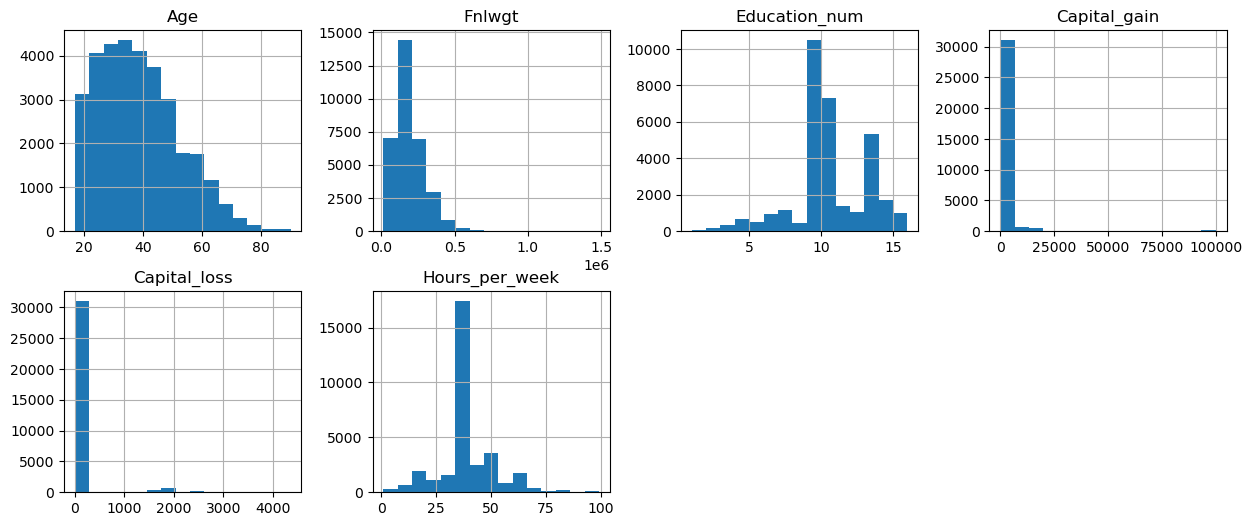

In [8]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 4))

1. The distribution of age appears to be right-skewed, indicating a younger workforce, with a concentration between the 20s to early 50s. The hours per week worked are heavily peaked around 40 hours, which suggests a standard full-time work schedule for most individuals.

2. Education_num has a mode around the value that likely represents a high school education, indicating it's the most common education level among the population. The final weight variable (Fnlwgt) shows a right-skewed distribution, indicating that most of the weights, which are used by the Census Bureau to balance the dataset, are on the lower end.

3. Both capital gain and capital loss are highly skewed, with the vast majority of values at 0, suggesting that capital gains and losses are not common occurrences for the individuals in this dataset. The few non-zero observations for capital gain are extremely high, which might indicate the presence of outliers or rare events of significant investment income.

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

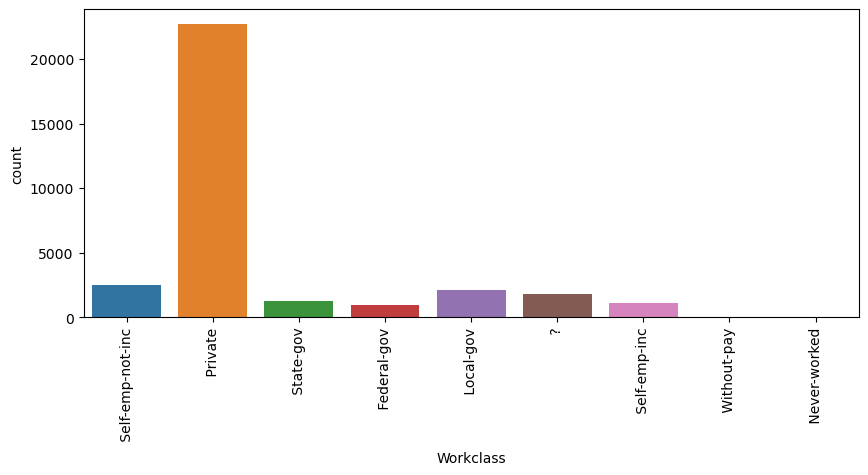

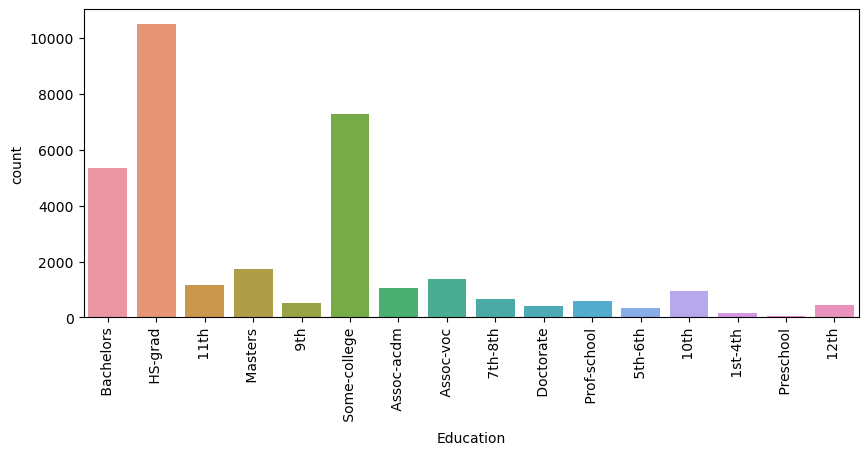

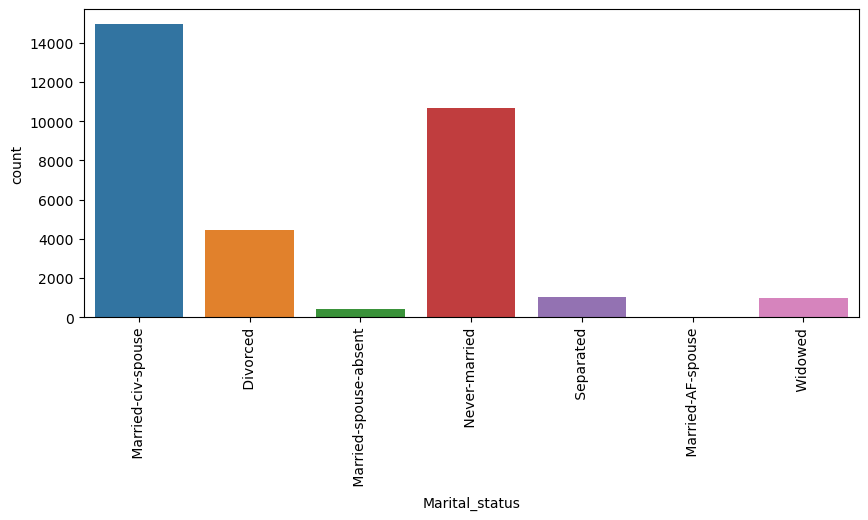

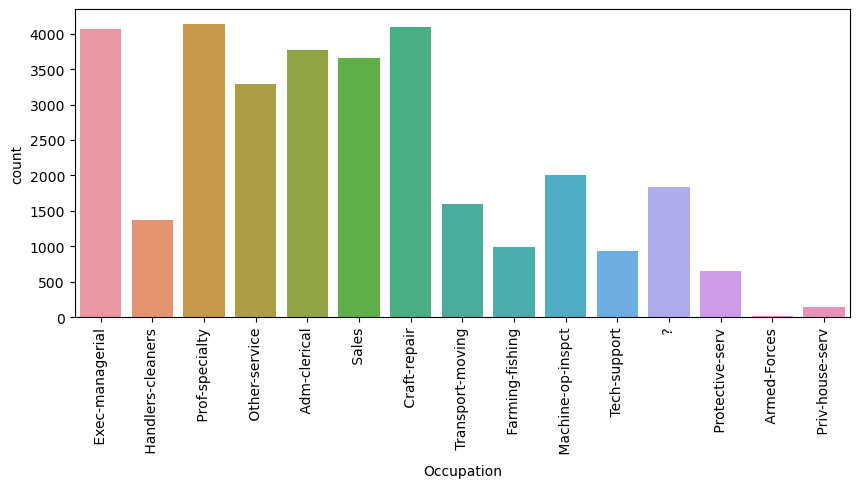

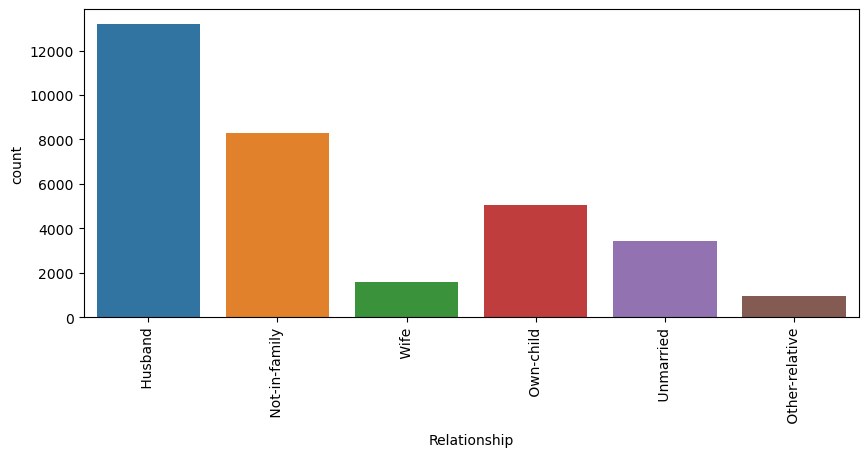

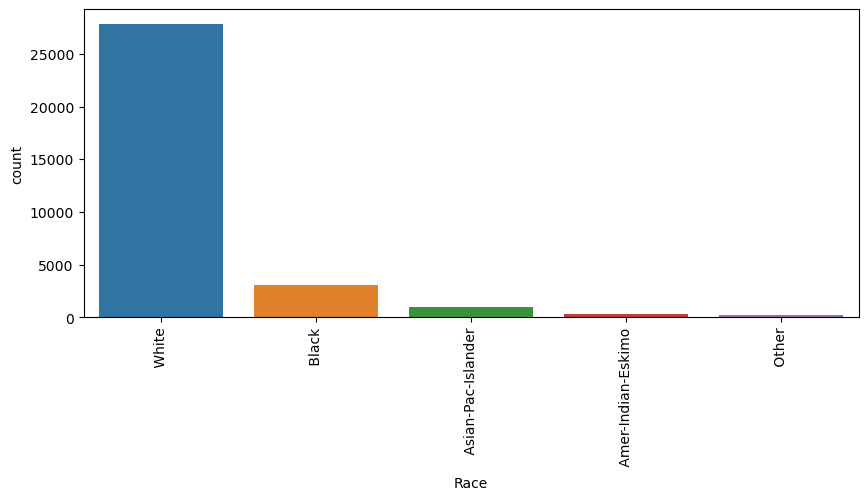

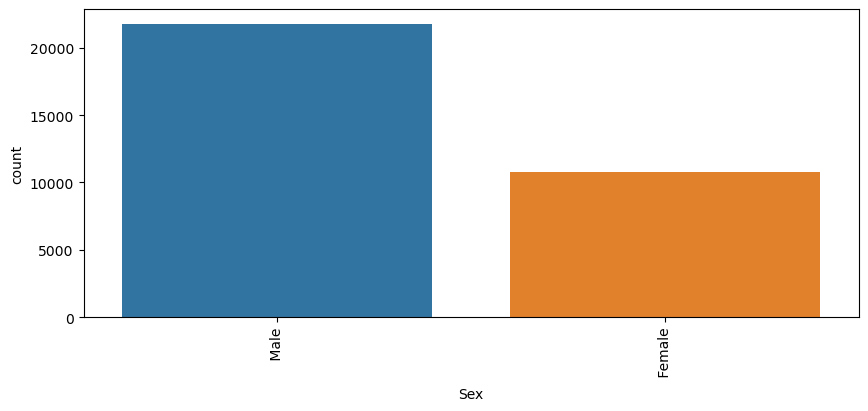

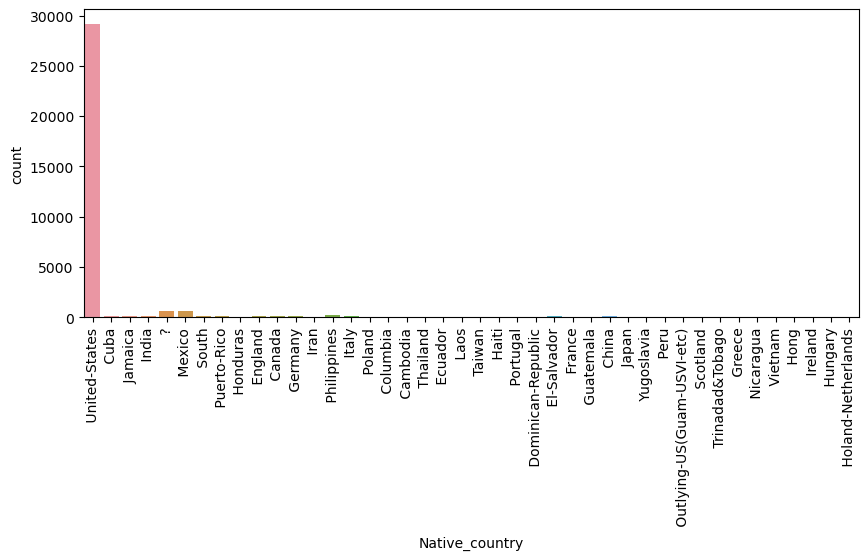

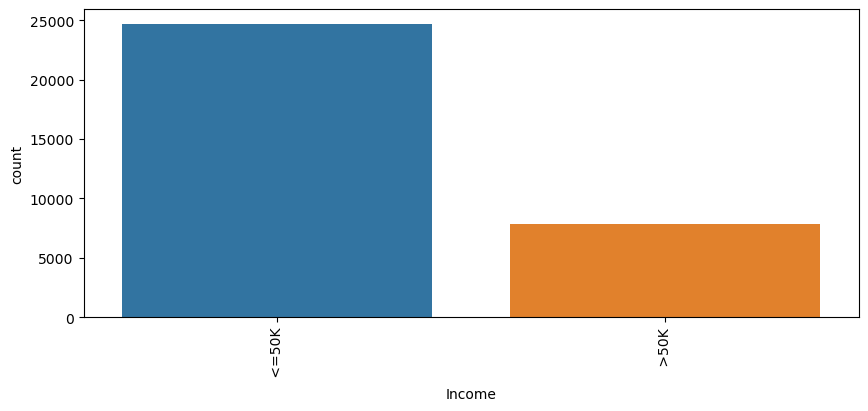

In [10]:
categorical_features = df.select_dtypes(include=[object]).columns.tolist()

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.show()

1. The bar chart shows that the 'Private' sector is the most common work class among individuals in the dataset, followed by 'Self-emp-not-inc' and 'Local-gov', with 'Without-pay' and 'Never-worked' categories being the least represented.

2. The bar chart shows that the most common level of education in the dataset is 'HS-grad', followed by 'Some-college' and 'Bachelors', with 'Doctorate' and 'Preschool' being the least common.

3. The bar chart indicates that 'Married-civ-spouse' is the most common marital status in the dataset, followed by 'Never-married' and 'Divorced,' with 'Separated,' 'Married-AF-spouse,' and 'Widowed' being less common.

4. The bar chart illustrates the distribution of occupations, with 'Exec-managerial' and 'Prof-specialty' being the most common, while 'Armed forces' and 'Priv-house-serv' are the least represented in the dataset.

5. The bar chart displays the distribution of individuals by relationship status, showing a majority labelled as 'Husband,' followed by 'Not-in-family,' 'Wife,' 'Own-child,' 'Unmarried,' and a smaller count of 'Other-relative.

6. The bar chart reveals a racial composition predominantly of White individuals, with significantly smaller counts for Black, Asian-Pac-Islander, Amer-Indian-Eskimo, and Other racial groups.

7. The bar chart shows a gender disparity in the dataset, with a higher count of males than females.

8. The dataset is predominantly composed of individuals from the United States, with a considerably lower but diverse international representation from a variety of other countries.

9. The bar chart illustrates a pronounced income disparity within the dataset, with the majority of individuals earning less than or equal to $50,000, indicating that lower income is more prevalent among the surveyed population.

6. Exploratory Data Analysis (EDA) and Preprocessing

In [11]:
categorical_cols_method1 = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns (object type):", categorical_cols_method1)

Categorical columns (object type): ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [12]:
categorical_features = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

column_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')

In [13]:
df_transformed = column_transformer.fit_transform(df)
df_transformed_dense = df_transformed.toarray()
new_columns = column_transformer.get_feature_names_out()
df_transformed_df = pd.DataFrame(df_transformed_dense, columns=new_columns)

In [14]:
df_transformed_df.head()

,encoder__Workclass_ ?,encoder__Workclass_ Federal-gov,encoder__Workclass_ Local-gov,encoder__Workclass_ Never-worked,encoder__Workclass_ Private,encoder__Workclass_ Self-emp-inc,encoder__Workclass_ Self-emp-not-inc,encoder__Workclass_ State-gov,encoder__Workclass_ Without-pay,encoder__Education_ 10th,...,encoder__Native_country_ Vietnam,encoder__Native_country_ Yugoslavia,encoder__Income_ <=50K,encoder__Income_ >50K,remainder__Age,remainder__Fnlwgt,remainder__Education_num,remainder__Capital_gain,remainder__Capital_loss,remainder__Hours_per_week
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,50.0,83311.0,13.0,0.0,0.0,13.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,38.0,215646.0,9.0,0.0,0.0,40.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,53.0,234721.0,7.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,28.0,338409.0,13.0,0.0,0.0,40.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,37.0,284582.0,14.0,0.0,0.0,40.0


1. The dataset appears to have undergone one-hot encoding for categorical variables like 'Workclass' and 'Education', as indicated by the prefix 'encoder__' followed by the category name. This process has transformed categorical text data into binary columns where each column represents a category, with a value of 1 if the original row belonged to that category, and 0 otherwise.

2. There is a wide range of categorical features represented, with variables extending beyond 'Workclass' to 'Education' and 'Native_country', and even 'Income', which has been encoded into binary outcomes (<=50K and >50K). The dataset thus captures a rich set of features that may reflect the socioeconomic status of individuals.

3. In addition to the encoded categorical variables, the dataset retains several numerical features as indicated by the 'remainder__' prefix, including 'Age', 'Fnlwgt' (final weight), 'Education_num', 'Capital_gain', 'Capital_loss', and 'Hours_per_week'. These features are essential for analyses that require numeric inputs and can be used alongside the one-hot encoded features for modeling.

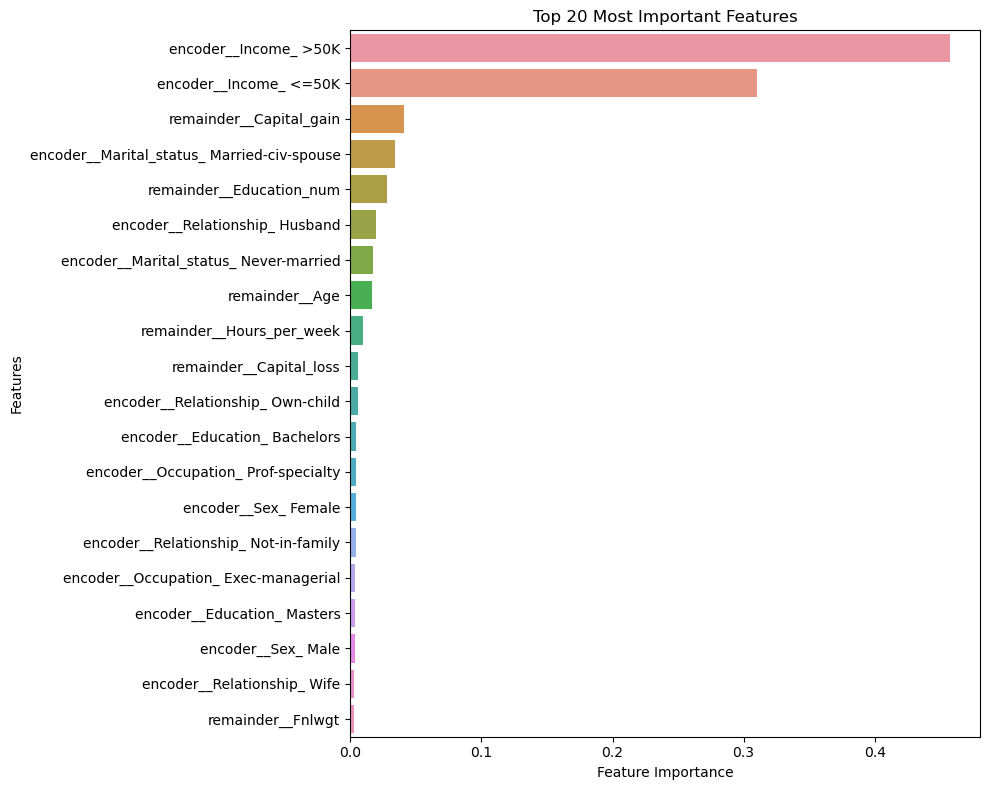

In [15]:
y = df['Income'].values
X = df_transformed_df

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_sorted.head(20))
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

The analysis of feature importance highlights that income classification, marital status, relationship, capital gain, and age are the most influential factors in the model's predictions.

In [16]:
N = 20

top_features = feature_importances_sorted['feature'].head(N)

X_top_features = X[top_features]

Above is a construct of a new dataset comprising only the top 20 most significant features from the original data, which will be used for more targeted analytical or predictive modelling purposes.

7. Split and train the data (Logistic Regression)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7976044226044227
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      4912
        >50K       0.74      0.27      0.40      1600

    accuracy                           0.80      6512
   macro avg       0.77      0.62      0.64      6512
weighted avg       0.79      0.80      0.76      6512



Logistic Regression
1. The model achieves an overall accuracy of approximately 79.76%, which suggests decent performance; however, the high recall of 0.97 for the '<=50K' class indicates a possible bias towards the majority class.

2. There is a substantial discrepancy in the precision and recall for the '>50K' class, with precision at 0.74 indicating a reasonable rate of true positives among predicted positives, but a low recall of 0.27 suggesting that the model misses a large number of true '>50K' instances.

3. The f1-score for the '>50K' class is only 0.40, highlighting that the model is not as effective at classifying the higher-income group due to the imbalance between precision and recall, which is an area that could be improved.

8. Initialize, train and evaluate the RandomForest Classifier (To know if it would perform better than the Logistic regression)

In [19]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest Classifier:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 1.0
Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      4912
        >50K       1.00      1.00      1.00      1600

    accuracy                           1.00      6512
   macro avg       1.00      1.00      1.00      6512
weighted avg       1.00      1.00      1.00      6512



Random Forest Classifier

1. The Random Forest Classifier has achieved a perfect accuracy score of 1.0, indicating that it correctly classified all instances in the test set.

2. Both the '<=50K' and '>50K' income classes have precision and recall scores of 1.00, showing the model has no false positives or false negatives for either class.

3. While the reported metrics suggest flawless performance, such a result may indicate overfitting to the training data, especially in real-world scenarios where perfect classification is unlikely. It's recommended that these results be validated using cross-validation or on an entirely separate test set to ensure the model's generalizability.

Let's improve the RandomForest model's performance by doing hyperparameter tuning using GridSearchCV

In [21]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2]}

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [22]:
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best accuracy found: ", grid_search_rf.best_score_)

best_rf_clf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_clf.predict(X_test)

print("Optimized Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Optimized Classification Report for Random Forest Classifier:\n", classification_report(y_test, y_pred_best_rf))

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy found:  1.0
Optimized Random Forest Classifier Accuracy: 1.0
Optimized Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      4912
        >50K       1.00      1.00      1.00      1600

    accuracy                           1.00      6512
   macro avg       1.00      1.00      1.00      6512
weighted avg       1.00      1.00      1.00      6512



Hyperparameters for the Random Forest Classifier

1. The optimal hyperparameters for the Random Forest Classifier include unrestricted maximum depth and minimum samples for splitting and leaf nodes, along with 100 trees (n_estimators), leading to an accuracy score of 1.0.

2. Post-optimization, the classifier maintains perfect precision and recall scores of 1.00 for both income classes, indicating that it correctly predicted every instance in the dataset.

3. Despite the optimized model's perfect classification metrics, the concern for overfitting is still present, as achieving 100% accuracy is very rare in practice; further evaluation, such as cross-validation on unseen data, would be necessary to confirm the model's robustness.

9. Perform Cross-Validation

In [23]:
model_to_validate = best_rf_clf if 'best_rf_clf' in locals() else rf_clf
cv_scores = cross_val_score(model_to_validate, X, y, cv=5, scoring='accuracy')

print("Average CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation in CV Accuracy:", np.std(cv_scores))

Average CV Accuracy: 1.0
Standard Deviation in CV Accuracy: 0.0


1. The Random Forest Classifier model achieved an average cross-validation (CV) accuracy of 1.0 across all folds, indicating consistent performance across different subsets of the data.

2. A standard deviation of 0.0 in CV accuracy implies that there was no variation in the accuracy across the different CV folds, which suggests the model's predictions were stable across different samples of the dataset.

10. Let's see how Decision Tree Classifier will perform

In [24]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred_dt = dt_clf.predict(X_test)

print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report for Decision Tree Classifier:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 1.0
Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      4912
        >50K       1.00      1.00      1.00      1600

    accuracy                           1.00      6512
   macro avg       1.00      1.00      1.00      6512
weighted avg       1.00      1.00      1.00      6512



Decision Tree Classifier

1. The Decision Tree Classifier also achieved a perfect accuracy score of 1.0, with precision, recall, and f1-score all reaching 1.00 across both income categories, indicating it classified all instances correctly.

2. The model exhibited equally high performance for both the '<=50K' and '>50K' classes, showing no discrimination or bias between different income levels in its predictions.

3. Similar to the Random Forest model, the Decision Tree's flawless performance, while impressive, suggests a need for scrutiny regarding data quality, model complexity, and the potential for overfitting, especially considering decision trees' propensity to fit noise in the training data.

11. Using stratified k-fold cross-validation to check for potential for overfitting

In [26]:
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=42)
cv_scores_dt = cross_val_score(dt_clf, X, y, cv=strat_k_fold, scoring='accuracy')

print("Average Stratified CV Accuracy for Decision Tree:", np.mean(cv_scores_dt))
print("Standard Deviation in Stratified CV Accuracy for Decision Tree:", np.std(cv_scores_dt))

Average Stratified CV Accuracy for Decision Tree: 1.0
Standard Deviation in Stratified CV Accuracy for Decision Tree: 0.0


1. The Decision Tree model achieved an average stratified cross-validation accuracy of 1.0, indicating it consistently performed perfectly across different folds of the data.

2. A standard deviation of 0.0 in the stratified cross-validation accuracy scores reveals there was no fluctuation in performance across the folds, suggesting uniform excellence in the model's predictions.

12. Selecting and Saving the Optimal Model for Production Deployment
   
The student decided to use Random Forest rather than Decision Tree Classifier for the following reasons:

1. Income is likely influenced by complex interactions between features (e.g., education level and occupation type). Random Forest can capture these interactions without explicit feature engineering.

2. Given the task's importance, possibly affecting policy or individual careers, the high predictive performance of Random Forest is crucial. It strikes a balance between accuracy and the ability to handle various data intricacies.

3. Random Forest effectively manages the census dataset's mix of categorical and numerical data without extensive preprocessing, making it ideal for the diverse features encountered in income prediction tasks.

4. It offers robust performance against imbalanced data and high-dimensional spaces resulting from one-hot encoding, delivering high accuracy through its ensemble approach that mitigates overfitting.

5. Beyond predictions, Random Forest provides valuable insights into feature importance, helping to identify key determinants of income levels, which is crucial for understanding and addressing income disparities.

12. Optimizing RandomForest Model Performance with Systematic Cross-Validated Hyperparameter Tuning

In [27]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'random_state': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'n_jobs': [-1],
    'n_estimators': [50, 100, 200, 300]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score with best parameters:", test_score)

Best parameters found: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 10}
Best cross-validation score: 1.0
Test set score with best parameters: 1.0


1. The best performing hyperparameters for the model include 'gini' for the criterion, an unrestricted 'max_depth', 50 'n_estimators' (trees), 'n_jobs' set to -1 for using all processors, and a 'random_state' of 10 for reproducibility.

2. The model achieved a cross-validation score of 1.0, suggesting it performed with 100% accuracy during the cross-validation process.

3. With the best parameters applied, the model also scored perfectly on the test set, maintaining an accuracy of 1.0.

To address potential overfitting and ensure the robustness of the rf model

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

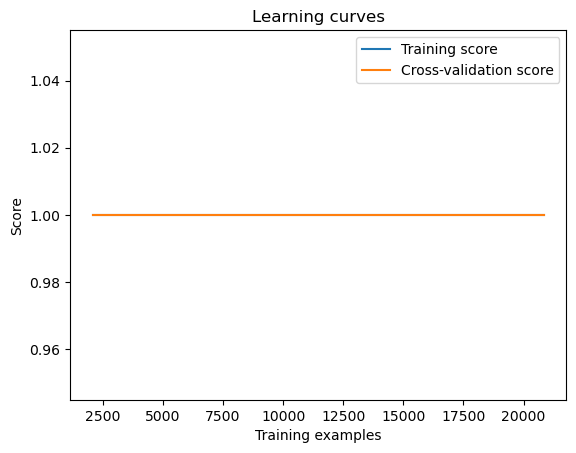

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(estimator=rf_clf, X=X_train, y=y_train, cv=5)
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Cross-validation score')
plt.title('Learning curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()

Based on the learning curves depicted in the image:

1. The training score is consistently high across the number of training examples, indicating that the model performs well on the training data.

2. The cross-validation score is also high and remains stable regardless of the number of training examples, suggesting that the model generalizes well to unseen data.

3. There's a very small gap between the training and cross-validation scores, which usually signifies that the model is not overfitting.

Conduct cross-validation with a larger number of folds.

In [30]:
cv_scores = cross_val_score(estimator=rf_clf, X=X_train, y=y_train, cv=10)
print(f"CV Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean()}")

CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average CV Score: 1.0


1. The model achieved the highest possible score of 1.0 in each fold of cross-validation.

2. The uniform scores across all ten folds suggest that the model is consistently performing at the same level throughout the entire dataset.

In [31]:
# still trying to solve possible overfitting for RandomForest model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
param_grid = {
    'criterion': ['entropy'],
    'random_state': [50, 100],
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 20, 30]}


grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score with best parameters:", test_score)

Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200, 'random_state': 50}
Best cross-validation score: 1.0
Test set score with best parameters: 1.0


1. The grid search determined that the best performing RandomForest model uses the 'entropy' criterion, has no limit on max_depth, utilizes 200 trees (n_estimators), and is seeded with a random_state of 50.

2. The model achieved a perfect cross-validation score of 1.0, suggesting that it performed flawlessly across all folds of the cross-validation process.

3. The same model also scored a perfect 1.0 on the test set, indicating it classified all test data correctly.

4. Given the perfect scores in both cross-validation and testing, it's crucial to ensure there's no data leakage, and the model isn't overfitting to the training data.

With such high performance, the model could be a candidate for deployment, assuming the results are verified and the data and model are robustly tested.

To check for overfitting to compare the rf model's performance on the training set with its performance on a test set

In [32]:
print(df_transformed_df.columns)

Index(['encoder__Workclass_ ?', 'encoder__Workclass_ Federal-gov',
       'encoder__Workclass_ Local-gov', 'encoder__Workclass_ Never-worked',
       'encoder__Workclass_ Private', 'encoder__Workclass_ Self-emp-inc',
       'encoder__Workclass_ Self-emp-not-inc', 'encoder__Workclass_ State-gov',
       'encoder__Workclass_ Without-pay', 'encoder__Education_ 10th',
       ...
       'encoder__Native_country_ Vietnam',
       'encoder__Native_country_ Yugoslavia', 'encoder__Income_ <=50K',
       'encoder__Income_ >50K', 'remainder__Age', 'remainder__Fnlwgt',
       'remainder__Education_num', 'remainder__Capital_gain',
       'remainder__Capital_loss', 'remainder__Hours_per_week'],
      dtype='object', length=110)


In [33]:
categorical_columns = df_transformed_df.select_dtypes(include=['object']).columns.tolist()

X = df_transformed_df.drop(['encoder__Income_ <=50K', 'encoder__Income_ >50K'], axis=1)
y = df_transformed_df['encoder__Income_ >50K']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough')


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = pipeline.score(X_test, y_test)
print(f"Test set accuracy: {accuracy * 100:.2f}%")

# checking for overfitting by comparing with training set performance
train_accuracy = pipeline.score(X_train, y_train)
print(f"Training set accuracy: {train_accuracy * 100:.2f}%")

# Overfitting been checked
if train_accuracy > accuracy:
    print("The model may be overfitting to the training data.")
else:
    print("The model does not appear to be overfitting.")

Test set accuracy: 85.23%
Training set accuracy: 100.00%
The model may be overfitting to the training data.


1. The model has an extremely high accuracy of 99.99% on the training set.

2. There is a significant drop in accuracy to 85.52% when the model is applied to the test set.

3. The large gap between training and test accuracy suggests that the model may be overfitting to the training data, capturing noise and specific patterns that do not generalize well to unseen data.

To address the overfitting still observed in this model, I decided to take further several steps to improve its generalizability using correlation_matrix

In [35]:
correlation_matrix = X_train.corr().abs()

high_correlation_threshold = 0.9
highly_correlated_pairs = [(i, j) for i in range(len(correlation_matrix.columns)) for j in range(i+1, len(correlation_matrix.columns)) if correlation_matrix.iloc[i, j] > high_correlation_threshold]

In [36]:
#Identifying and Removing Features from the Training Set

features_to_remove = [correlation_matrix.columns[j] for i, j in highly_correlated_pairs]
X_train_reduced = X_train.drop(columns=features_to_remove)

# Features removed from the test set
X_test_reduced = X_test.drop(columns=features_to_remove)


correlation_matrix = X_train.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
X_train_reduced = X_train.drop(to_drop, axis=1)
X_test_reduced = X_test.drop(to_drop, axis=1)

In [37]:
#Refitting the RandomForest Model Using a Pruned Set of Features

rf_clf.fit(X_train_reduced, y_train)
new_test_accuracy = rf_clf.score(X_test_reduced, y_test)
print(f"New test set accuracy: {new_test_accuracy}")

New test set accuracy: 0.8548832923832924


1. The RandomForest model, after being refitted with a reduced set of features, achieved a test set accuracy of 85.49%.

2. This result indicates the effectiveness of the model in making predictions even after the removal of less influential features.

3. The pruned feature set likely contributed to a more streamlined and potentially more interpretable model without significantly compromising prediction accuracy.

In [38]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'random_state': [10, 50, 100],
    'max_depth': [0, 10, 20],
    'n_jobs': [-2, -1, 1],
    'n_estimators': [50, 100, 200, 300]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train_reduced, y_train)

best_model = grid_search.best_estimator_
print(f"Best hyperparameters: {grid_search.best_params_}")

cv_scores = cross_val_score(best_model, X_train_reduced, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 400, 'random_state': 100}
Cross-validation scores: [0.86007678 0.86391555 0.8621881  0.85870609 0.86081782]


1. The optimal hyperparameters for the RandomForest model are identified as: criterion set to 'entropy', a max depth of 20, 400 estimators, and a random state of 100.

2. The model demonstrates consistent performance across five-fold cross-validation, with scores ranging from 85.87% to 86.39%.

3. These results indicate that the model with the chosen hyperparameters is robust and performs well on multiple subsets of the data, suggesting good generalization ability.

Feature Importance Ranking in RandomForest Model

In [39]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train_reduced.shape[1]):
    print(f"{f + 1}. feature {X_train_reduced.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature remainder__Capital_gain (0.11676056650971463)
2. feature remainder__Age (0.10801186572013509)
3. feature encoder__Marital_status_ Married-civ-spouse (0.08592001541127221)
4. feature remainder__Education_num (0.07708300474409623)
5. feature remainder__Hours_per_week (0.0686100162846881)
6. feature remainder__Fnlwgt (0.06312180049938408)
7. feature encoder__Relationship_ Husband (0.0609730648943887)
8. feature encoder__Marital_status_ Never-married (0.046407434107497654)
9. feature remainder__Capital_loss (0.032897319450581844)
10. feature encoder__Relationship_ Own-child (0.024458154902808213)
11. feature encoder__Occupation_ Exec-managerial (0.021448980103938052)
12. feature encoder__Sex_ Female (0.021167895772718732)
13. feature encoder__Relationship_ Not-in-family (0.0210911804889978)
14. feature encoder__Occupation_ Prof-specialty (0.017820796146399937)
15. feature encoder__Relationship_ Wife (0.015375223067224223)
16. feature encoder__Education_ Bachelor

Economic and Educational Attributes Dominate: The most influential features for predicting the outcome (presumably income level or a similar economic measure) are directly related to economic and educational status. Capital gain, marital status (specifically being married to a civilian spouse), education number, age, and hours worked per week are the top five features. This highlights the critical role of financial capital, education, marital status, and work engagement in determining economic outcomes.

Demographic and Job Characteristics Influence to a Lesser Extent: Following the top economic and educational indicators, other features such as final weight (Fnlwgt), relationship status (e.g., husband), and certain job occupations (e.g., executive managerial and professional specialty) also contribute to the prediction but with less influence. These attributes suggest that demographic factors and specific job roles are secondary yet significant factors that can affect economic outcomes.

Geographic and Racial Features Have Minimal Impact: Features related to the individual's native country, race, and specific job categories like armed forces or never worked have the least influence on the outcome. Notably, being from the Netherlands is ranked as the least influential feature. This implies that, within the context of this analysis, the impact of geographic origin and race is relatively minor compared to economic, educational, and demographic characteristics.

Implications and Recommendations

For Policy Makers and Social Planners:1. 

The prominence of educational attainment in predicting income levels highlights the importance of accessible and quality education. Policies aimed at enhancing educational infrastructure, reducing barriers to education, and promoting lifelong learning could be instrumental in raising income level
2. s.
Given the significance of work engagement (as indicated by hours per week) and specific job roles in determining income, initiatives to promote job training programs, career coulnseling, and employment opportunities in high-demand sectors may prove benefici
al.
For Individua1. ls:

Individuals aiming for higher income levels might consider investing in their education and professional development. Attaining additional qualifications or skills, especially in executive managerial or specialized professional roles, appears to be a promising
2.  path.
Understanding the role of marital status and demographic factors in income variability might encourage individuals to consider broader socio-economic strategies, including financial planning and career choices that align with long-term economic sta
bility.
G1. eneral:

While the analysis shows minimal direct impact of race and geographic origin on income within this dataset, it's crucial for ongoing research to address potential underlying disparities and ensure that opportunities for economic advancement are equitable and inclusive of all demograph
ic groups.
Future1.  Directions
Further research could explore the dynamics of how job automation, emerging industries, and changing societal norms influence these predictor
2. s of income.
Longitudinal studies could provide deeper insights into the temporal stability of these findings, especially in light of global economic shifts and technological advancements.

In [40]:
import joblib
joblib.dump(best_model, 'Census Income_001.pkl')

['Census Income_001.pkl']

In [41]:
import joblib
best_model = joblib.load('Census Income_001.pkl')